# Aula 16

- Kaggle: https://www.kaggle.com/joaotostes/classificacao-brasileirao-10-anos


#### Importa as bibliotecas


In [1]:
import logging
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#### Carrega a base dados

In [2]:
df = pd.read_csv('Data-Camp-Brasileiro_1.csv', delimiter=';')

#### Descrição do conjunto de dados

Esse conjunto possui dados das tabelas dos campeonatos de futebol brasileiros de 2009 a 2018.

**ANO**: ano do campeonato

**Posicao**: posição da equipe

**Pontos**: pontos conquistados

**Vitória**: vitórias

**Empates**: empates

**Derrotas**: derrotas

**Gols pro**: gols realizados

**Gols Contra**: gols sofridos

**Saldo Gols**: diferença entre realizados e sofridos

**Aproveitamento**: porcentagem de pontos em relação ao total

**Estados**: estados das equipes

#### Explorando os dados

In [3]:
df.head(5)

,ANO,Posicao,Time,Pontos,Vitoria,Empates,Derrotas,Gols pro,Gols Contra,Saldo Gols,Aproveitamento,Estados
0,2009,1,Flamengo,67,19,10,9,58,44,14,58.8,RJ
1,2009,2,Internacional,65,19,8,11,65,44,21,57.0,RS
2,2009,3,Sao Paulo,65,18,11,9,57,42,15,57.0,SP
3,2009,4,Cruzeiro,62,18,8,12,58,53,5,54.4,MG
4,2009,5,Palmeiras,62,17,11,10,58,45,13,54.4,SP


In [4]:
print('Linhas: {} e Colunas: {}'.format(df.shape[0], df.shape[1]))

Linhas: 200 e Colunas: 12


In [5]:
print('Colunas presentes: {}'.format(df.columns))

Colunas presentes: Index(['ANO', 'Posicao', 'Time', 'Pontos', 'Vitoria', 'Empates', 'Derrotas',
       'Gols pro', 'Gols Contra', 'Saldo Gols', 'Aproveitamento', 'Estados'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
ANO               200 non-null int64
Posicao           200 non-null int64
Time              200 non-null object
Pontos            200 non-null int64
Vitoria           200 non-null int64
Empates           200 non-null int64
Derrotas          200 non-null int64
Gols pro          200 non-null int64
Gols Contra       200 non-null int64
Saldo Gols        200 non-null object
Aproveitamento    200 non-null float64
Estados           200 non-null object
dtypes: float64(1), int64(8), object(3)
memory usage: 18.8+ KB


#### Times do campeonato brasileiro

In [7]:
df['Time'].unique()

array(['Flamengo', 'Internacional', 'Sao Paulo', 'Cruzeiro', 'Palmeiras',
       'Avai', 'Atletico MG', 'Gremio', 'Goias', 'Corinthians', 'Barueri',
       'Santos', 'Vitoria', 'Athletico PR', 'Botafogo', 'Fluminense',
       'Coritiba', 'Santo Andre', 'Nautico', 'Sport', 'Vasco', 'Ceara',
       'Atletico GO', 'Guarani', 'Gremio Barueri', 'Figueirense', 'Bahia',
       'America MG', 'Ponte Preta', 'Portuguesa', 'Criciuma',
       'Chapecoense', 'Joinville', 'Santa Cruz PE', 'Atletico  MG',
       'Parana'], dtype=object)

#### Renomeando as colunas

In [8]:
df.rename(columns={'ANO':'ano', 'Posicao':'posicao', 'Time':'time', 'Pontos':'pontos','Vitoria':'vitorias', 
                   'Empates':'empates', 'Derrotas':'derrotas', 'Gols pro':'golsPro', 'Gols Contra':'golsContra', 
                   'Saldo Gols':'saldoGols','Aproveitamento':'aproveitamento', 'Estados':'estados'}, inplace=True)
df.head()

,ano,posicao,time,pontos,vitorias,empates,derrotas,golsPro,golsContra,saldoGols,aproveitamento,estados
0,2009,1,Flamengo,67,19,10,9,58,44,14,58.8,RJ
1,2009,2,Internacional,65,19,8,11,65,44,21,57.0,RS
2,2009,3,Sao Paulo,65,18,11,9,57,42,15,57.0,SP
3,2009,4,Cruzeiro,62,18,8,12,58,53,5,54.4,MG
4,2009,5,Palmeiras,62,17,11,10,58,45,13,54.4,SP


#### Estatística dos dados

In [9]:
desc = df.drop(['ano', 'posicao'], axis=1)
desc.describe()

,pontos,vitorias,empates,derrotas,golsPro,golsContra,aproveitamento
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,51.790000,13.855000,10.280000,13.865000,46.920000,46.950000,45.356000
std,11.625907,3.967706,2.528551,4.179007,10.234615,10.034989,10.216961
min,20.000000,4.000000,3.000000,4.000000,18.000000,22.000000,17.000000
25%,44.000000,11.000000,9.000000,11.000000,39.000000,40.000000,38.900000
50%,51.000000,14.000000,10.000000,14.000000,47.500000,46.000000,44.850000
75%,59.000000,16.000000,12.000000,17.000000,53.000000,53.000000,52.000000
max,81.000000,24.000000,17.000000,28.000000,77.000000,79.000000,71.000000


#### % de dados nulos e duplicados

In [10]:
print('% de dados ausentes:\n{}%'.format(df.isnull().mean()*100))

% de dados ausentes:
ano               0.0
posicao           0.0
time              0.0
pontos            0.0
vitorias          0.0
empates           0.0
derrotas          0.0
golsPro           0.0
golsContra        0.0
saldoGols         0.0
aproveitamento    0.0
estados           0.0
dtype: float64%


In [11]:
print('% de dados duplicados:\n{}%'.format(df.duplicated().mean()*100))

% de dados duplicados:
0.0%


#### Visualizando os dados

#### Quantidade de vitórias por time

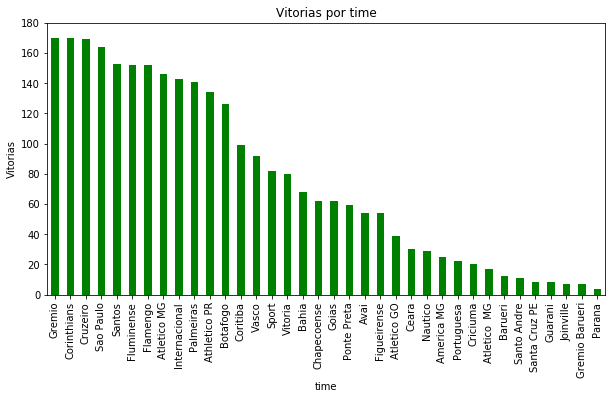

In [12]:
plt.figure(figsize=(10, 5))
plt.xlabel('Time')
plt.ylabel('Vitorias')
plt.ylim(0, 180)
df.groupby(['time'])['vitorias'].sum().sort_values(ascending=False).plot.bar(title='Vitorias por time', color='g')

#### Quantidade de derrotas por time

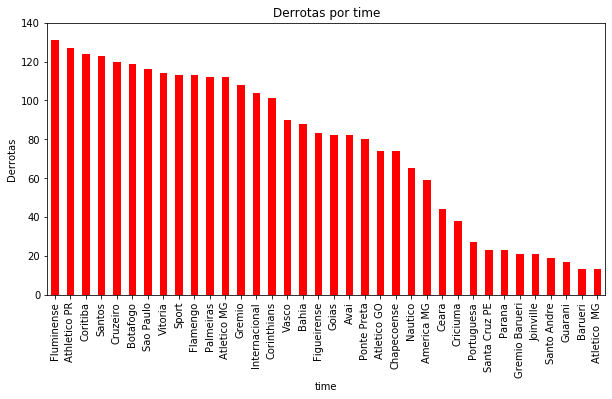

In [13]:
plt.figure(figsize=(10, 5))
plt.xlabel('Time')
plt.ylabel('Derrotas')
plt.ylim(0, 140)
df.groupby(['time'])['derrotas'].sum().sort_values(ascending=False).plot.bar(title='Derrotas por time', color='r')

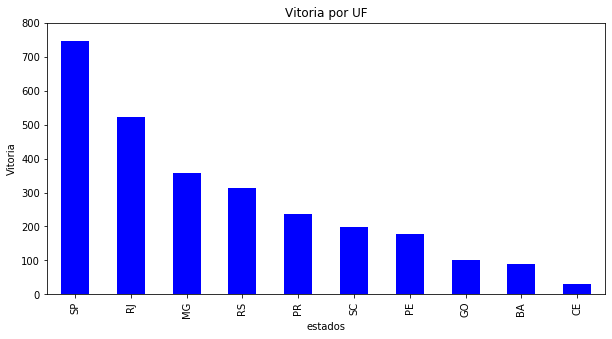

In [14]:
plt.figure(figsize=(10, 5))
plt.xlabel('Time')
plt.ylabel('Vitoria')
plt.ylim(0, 800)
df.groupby(['estados'])['vitorias'].sum().sort_values(ascending=False).plot.bar(title='Vitoria por UF', color='b')

#### Quantidade de empates por time

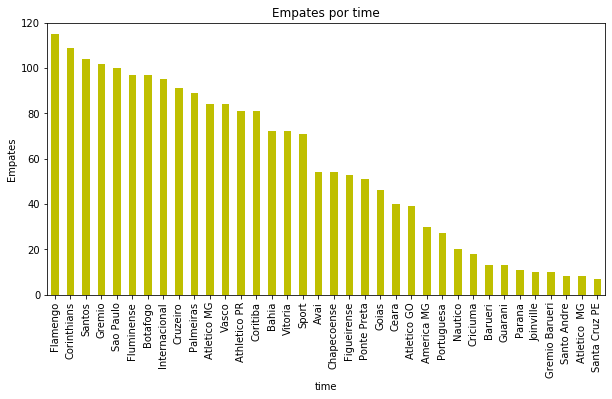

In [15]:
plt.figure(figsize=(10, 5))
plt.xlabel('Estados')
plt.ylabel('Empates')
plt.ylim(0, 120)
df.groupby(['time'])['empates'].sum().sort_values(ascending=False).plot.bar(title='Empates por time', color='y')

#### Média de pontos por time

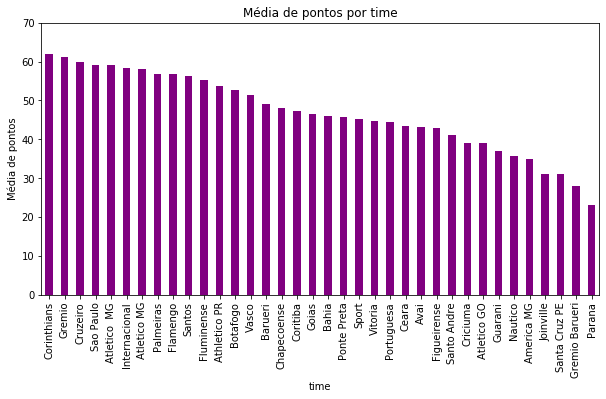

In [16]:
plt.figure(figsize=(10, 5))
plt.xlabel('Time')
plt.ylabel('Média de pontos')
plt.ylim(0, 70)
round(df.groupby(['time'])['pontos'].mean().sort_values(ascending=False), 2).plot.bar(title='Média de pontos por time', color='purple')

#### Aproveitamento por  time

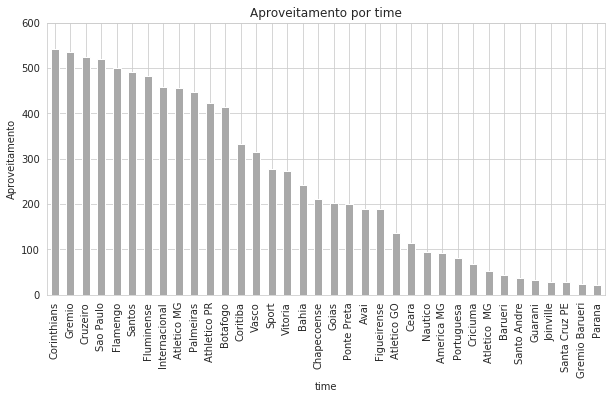

In [23]:
plt.figure(figsize=(10, 5))
plt.xlabel('Time')
plt.ylabel('Aproveitamento')
plt.ylim(0, 600)
round(df.groupby(['time'])['aproveitamento'].sum().sort_values(ascending=False), 2).plot.bar(title='Aproveitamento por time', 
                                                                                      color='darkGray')

#### Top 10 dos times que fizeram mais gols

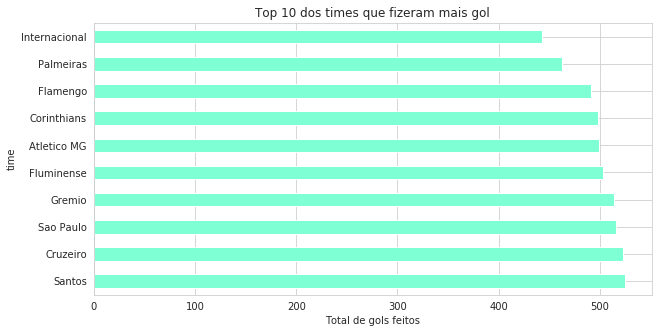

In [37]:
plt.figure(figsize=(10, 5))
plt.xlabel('Total de gols feitos')
plt.ylim(0, 600)

df.groupby(['time'])['golsPro'].sum().sort_values(ascending=False).head(10).plot.barh(title='Top 10 dos times que fizeram mais gol',
                                                                                      color='aquamarine')

#### Top 10 dos times que sofreram mais gols

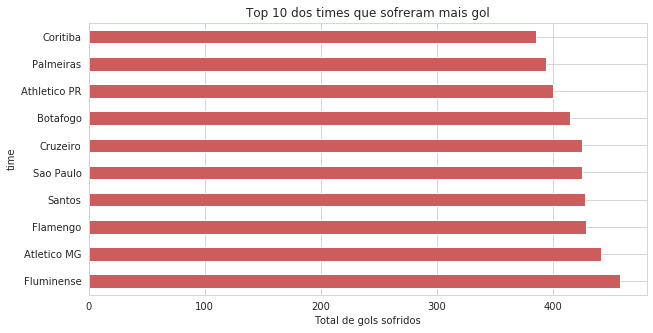

In [38]:
plt.figure(figsize=(10, 5))
plt.xlabel('Total de gols sofridos')
plt.ylim(0, 600)

df.groupby(['time'])['golsContra'].sum().sort_values(ascending=False).head(10).plot.barh(title='Top 10 dos times que sofreram mais gol',
                                                                                      color='indianRed')